<a href="https://colab.research.google.com/github/GabriRH21/Recomendador-Turistico/blob/main/Recomendador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Recomendador**

In [ ]:
from unittest import result
import openpyxl
import math
import matplotlib.pyplot as plt
from operator import itemgetter

# **Ordenar**

In [ ]:
# Orden:
# Bienestar
# Cultura
# Deportes
# Ocio
#Tours

with open('percentages.txt', 'r') as file:
  lines = file.readlines()
  activities = {}
  activity = 0

  i = 0
  #cada actividad ocupa 9 lineas
  for i in range(0, len(lines), 9):
    activity += 1
    percentages = [0,0,0,0,0]
    for j in range(9):
      if i + j < len(lines):
        if j > 0 and j < 6:
          words = lines[i+j].split()
          # Quitamos el punto
          category = words[1][:-1]

          index = 0
          if category == "BIENESTAR":
            index = 0
          elif category == "CULTURA":
            index = 1
          elif category == "DEPORTES":
            index = 2
          elif category == "OCIO":
            index = 3
          elif category == "TOURS":
            index = 4
          try:
            number = float(words[-1])
            percentages[index] = number
          except ValueError:
            pass
    activities[activity] = percentages
print(activities)


{1: [8.0, 26.0, 25.0, 91.0, 8.0], 2: [6.0, 30.0, 93.0, 49.0, 25.0], 3: [8.0, 71.0, 53.0, 91.0, 36.0], 4: [4.0, 71.0, 76.0, 76.0, 95.0], 5: [7.0, 34.0, 92.0, 41.0, 17.0], 6: [6.0, 28.0, 93.0, 57.0, 34.0], 7: [7.0, 18.0, 28.0, 92.0, 13.0], 8: [9.0, 90.0, 20.0, 36.0, 11.0], 9: [8.0, 91.0, 20.0, 36.0, 13.0], 10: [6.0, 93.0, 26.0, 28.0, 15.0], 11: [8.0, 28.0, 42.0, 91.0, 26.0], 12: [7.0, 25.0, 56.0, 74.0, 92.0], 13: [5.0, 53.0, 43.0, 60.0, 94.0], 14: [6.0, 93.0, 46.0, 56.0, 21.0], 15: [6.0, 41.0, 93.0, 49.0, 26.0], 16: [6.0, 93.0, 76.0, 38.0, 16.0], 17: [9.0, 90.0, 33.0, 77.0, 21.0], 18: [5.0, 65.0, 94.0, 87.0, 44.0], 19: [7.0, 92.0, 18.0, 53.0, 9.0], 20: [95.0, 35.0, 9.0, 58.0, 4.0], 21: [96.0, 27.0, 7.0, 56.0, 3.0], 22: [9.0, 21.0, 26.0, 90.0, 19.0], 23: [9.0, 21.0, 27.0, 90.0, 19.0], 24: [17.0, 63.0, 51.0, 82.0, 21.0], 25: [10.0, 89.0, 20.0, 66.0, 12.0], 26: [10.0, 89.0, 20.0, 66.0, 12.0], 27: [12.0, 87.0, 23.0, 78.0, 18.0], 28: [12.0, 87.0, 23.0, 78.0, 18.0], 29: [12.0, 87.0, 23.0, 78.0

##**Funcion de distancia euclidiana**

In [ ]:
def Eculidean_distance(UserPreferences, activity):
    distance = 0
    for i in range(len(UserPreferences)):
      distance += (UserPreferences[i] - activity[i]) ** 2

    return math.sqrt(distance)

## **Función de distancia del coseno**

In [ ]:
def cosineSimilarity(userPreferences, activity):
    scalarProduct = 0
    for i in range(0, len(UserPreferences)):
      scalarProduct += userPreferences[i] * activity[i]
    magnUser = math.sqrt(sum(u ** 2 for u in userPreferences))
    magnActivity = math.sqrt(sum(a ** 2 for a in activity))
    if magnUser == 0 or magnActivity == 0:
        return 0  # Para manejar el caso de vectores con magnitud cero
    return scalarProduct / (magnUser * magnActivity)

#**Recomendador**

In [ ]:
# Simulamos la entrada de un usuario
UserPreferences = [8.0, 26.0, 25.0, 91.0, 8.0]

bestActivity = None
bestDistance = -1  # Inicializar con un valor muy grande

for activity, percentage in activities.items():
    similarity = cosineSimilarity(UserPreferences, percentage)
    if similarity > bestDistance:
        bestActivity = activity
        bestDistance = similarity

print("Actividad recomendada:", bestActivity)

Actividad recomendada: 1


In [ ]:
similarities = {}
UserPreferences = [9.0, 20.0, 95.0, 31.0, 11.0]

for activity, percentage in activities.items():
    similarity = cosineSimilarity(UserPreferences, percentage)
    similarities[activity] = similarity

maxMinOrder = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

# Obtener los primeros 10 pares clave-valor del diccionario ordenado
bestIndexs = maxMinOrder[:10]

wb = openpyxl.load_workbook('activities.xlsx')
sheet = wb.active
data = []
i= 0

for row in sheet.iter_rows(min_row=2, values_only=True):
    activityName = row[1]
    data.append(activityName)

# Imprimir los 10 primeros pares clave-valor
for key, value in bestIndexs:
    print("La actividad '" + data[key - 1] + "': " + str(value))
    print("cats: " + str(activities[key]) + str(key)+ "\n")


La actividad 'Barranco de Masca': 0.9990080106831485
cats: [6.0, 20.0, 93.0, 34.0, 11.0]60

La actividad 'Forestal Park': 0.9926141950965102
cats: [7.0, 22.0, 92.0, 43.0, 10.0]38

La actividad 'Kayak de mar': 0.9855807618032412
cats: [7.0, 34.0, 92.0, 41.0, 17.0]5

La actividad 'Forestal Park': 0.9764339226295825
cats: [6.0, 30.0, 93.0, 49.0, 25.0]2

La actividad 'Unlimited Golf': 0.9737609986162694
cats: [14.0, 34.0, 94.0, 53.0, 5.0]99

La actividad 'Senderos de la Biosfera: Tegueste – Punta del Hidalgo (por Bejía - El Batán - Chinamada)': 0.9678005772076068
cats: [2.0, 35.0, 97.0, 58.0, 20.0]214

La actividad 'Pico Teide, el reino de las nubes': 0.9650974308147433
cats: [6.0, 41.0, 93.0, 49.0, 26.0]15

La actividad 'Kayak Los Gigantes + Avistamiento Cetáceos': 0.9629156925045351
cats: [2.0, 18.0, 97.0, 55.0, 33.0]163

La actividad 'El Teide, entre volcanes y estrellas': 0.9625852195424186
cats: [6.0, 35.0, 93.0, 59.0, 21.0]65

La actividad 'Bautismo de buceo': 0.9596636481153983
cats

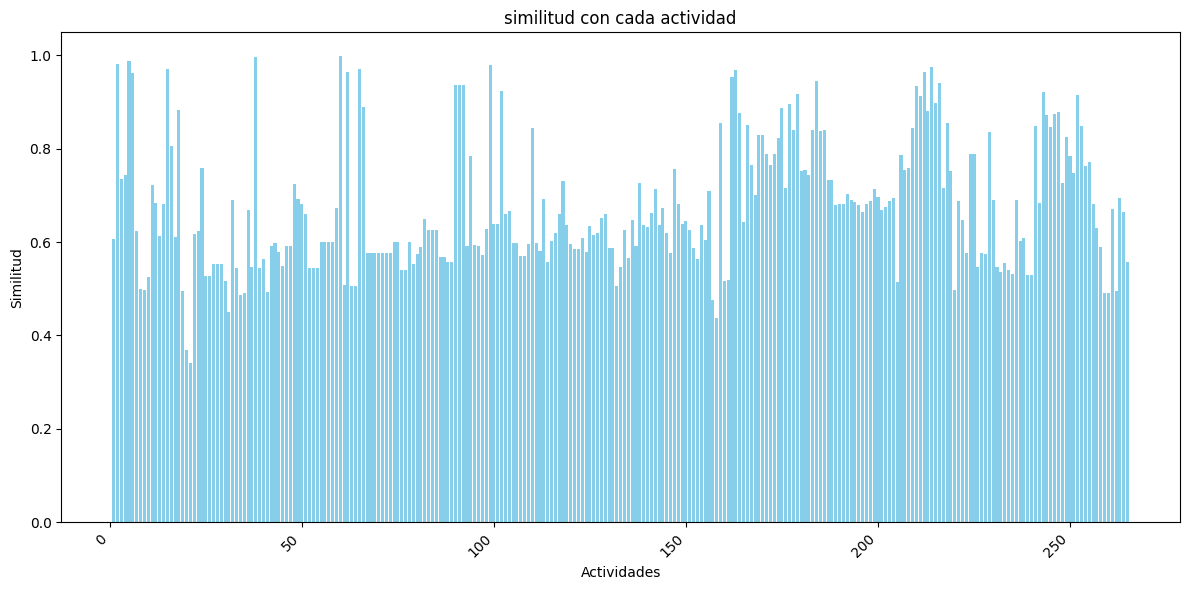

In [ ]:
keys = list(similarities.keys())
values = list(similarities.values())

plt.figure(figsize=(12, 6))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Actividades')
plt.ylabel('Similitud')
plt.title('similitud con cada actividad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

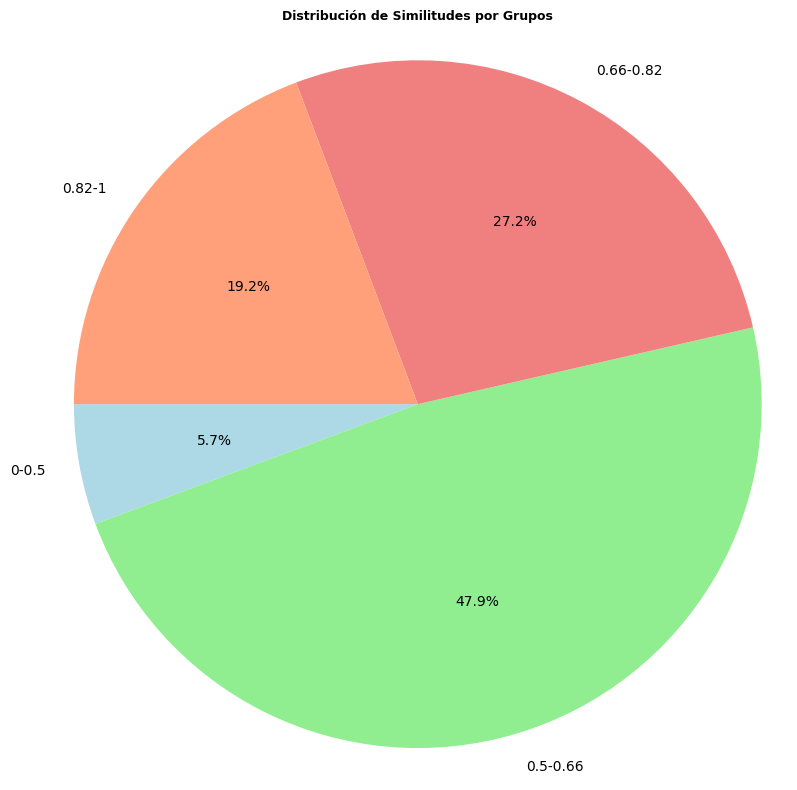

In [ ]:
groups = {'0-0.5': 0, '0.5-0.66': 0, '0.66-0.82': 0, '0.82-1': 0}

for sim in similarities.values():
    if sim < 0.5:
        groups['0-0.5'] += 1
    elif sim < 0.66:
        groups['0.5-0.66'] += 1
    elif sim < 0.82:
        groups['0.66-0.82'] += 1
    else:
        groups['0.82-1'] += 1

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(groups.values(), labels=groups.keys(), autopct='%1.1f%%', startangle=180, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Distribución de Similitudes por Grupos', fontsize=9, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()